In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [63]:
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2356,2357,15614934,McEwan,625,Germany,Female,37,4,142711.81,1,1,0,35625.41,0
6022,6023,15805690,Chin,694,Spain,Female,35,7,0.00,1,1,0,133570.43,1
5855,5856,15608541,Claiborne,498,France,Male,46,1,91857.66,1,1,0,101954.78,1
9674,9675,15578098,Jamieson,600,France,Male,31,8,0.00,2,1,1,121555.51,0
4235,4236,15609299,Chamberlain,595,France,Male,29,6,150685.79,1,1,0,87771.06,0
6885,6886,15606849,Blackall,698,France,Female,27,1,94920.71,1,1,1,40339.90,0


In [64]:
df.shape

(10000, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [66]:
df.duplicated().sum()

0

In [67]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [68]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [69]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [70]:
df.drop(columns = ['RowNumber','CustomerId', 'Surname'], axis = 1, inplace = True)

In [71]:
df.sample(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4958,655,France,Male,37,6,109093.41,2,1,0,1775.52,0
7209,653,France,Male,47,6,0.00,1,1,0,50695.93,1
6271,747,France,Male,49,6,202904.64,1,1,1,17298.72,1
8805,850,Spain,Male,39,8,0.00,2,1,1,37090.44,0
7095,753,Germany,Female,38,1,117314.92,1,1,0,122021.33,1
4750,850,France,Female,35,5,0.00,1,1,1,80992.80,0


In [72]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [73]:
df.sample(6)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8171,496,44,0,179356.28,2,1,0,2919.21,1,False,True,False
7672,555,30,1,0.00,2,0,0,88146.86,0,False,False,True
4213,767,34,8,0.00,2,1,0,94767.77,0,False,False,False
1266,548,36,3,0.00,1,1,0,65996.90,0,False,False,False
307,629,35,7,156847.29,2,1,0,31824.29,0,True,False,True
4532,548,38,0,178056.54,2,1,0,38434.73,0,False,True,True


In [74]:
df['Geography_Germany'][9017]

True

In [75]:
for i in ['Geography_Germany', 'Geography_Spain', 'Gender_Male']:
    df[i] = df[i].astype(int)
    for j in df[i]:
        if j == True:
            df.loc[j,i] = 1
        elif j == False:
            df.loc[j,i] = 0
        else:
            continue

In [76]:
df.sample(6)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3895,673,25,3,108244.82,2,1,1,103573.96,0,1,0,0
3285,735,43,9,98807.45,1,0,0,184570.04,1,1,0,0
4677,706,48,10,104478.12,3,0,1,158248.71,1,1,0,0
8354,556,31,1,128663.81,2,1,0,125083.29,0,1,0,0
3604,610,33,4,111582.11,1,0,0,113943.17,0,0,0,1
9842,638,30,9,136808.53,2,1,1,106642.97,0,0,1,1


In [97]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Exited'])
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [98]:
x_train.shape, y_train.shape

((8000, 11), (8000,))

In [99]:
x_train.shape, x_test.shape

((8000, 11), (2000, 11))

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [102]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71433554,
        -0.57273139,  0.9148601 ],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58331638,
        -0.57273139, -1.0930633 ],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71433554,
        -0.57273139, -1.0930633 ],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58331638,
        -0.57273139, -1.0930633 ],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58331638,
        -0.57273139, -1.0930633 ],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71433554,
        -0.57273139,  0.9148601 ]])

In [103]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [178]:
model = Sequential()

# model.add(Dense(3, activation = 'sigmoid', input_dim = 11))
# model.add(Dense(1, activation = 'sigmoid'))

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [179]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])  # binary_crossentropy --is--> logloss

In [181]:
history = model.fit(x_train_scaled, y_train, epochs = 40, validation_split = 0.2) # can try different epochs like 100 but not much improvement

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6724 - loss: 0.6210 - val_accuracy: 0.8075 - val_loss: 0.4796
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.4637 - val_accuracy: 0.8269 - val_loss: 0.4216
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8329 - loss: 0.4155 - val_accuracy: 0.8338 - val_loss: 0.3945
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8357 - loss: 0.4028 - val_accuracy: 0.8375 - val_loss: 0.3800
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3949 - val_accuracy: 0.8400 - val_loss: 0.3712
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8429 - loss: 0.3754 - val_accuracy: 0.8450 - val_loss: 0.3664
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8507 - loss: 0.3593 - val_accuracy: 0.8512 - val_loss: 0.3618
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.3628 - val_accuracy: 0.

In [182]:
model.layers[0].get_weights()

[array([[ 0.4532881 ,  0.48481226, -0.01612802,  0.1260432 ,  0.2256472 ,
          0.05046397,  0.02556321,  0.43751973, -0.10948731,  0.11475012,
          0.09089647],
        [-0.52572495, -0.24617068,  0.04571908, -0.03928554,  0.1474529 ,
          0.5393439 , -0.9831627 , -0.25896826, -0.28039545, -0.08879878,
         -0.3912479 ],
        [-0.02834639,  0.39448053, -0.03170722, -0.12368737,  0.16879167,
          0.33568928, -0.08240525,  0.2008752 ,  0.32682154, -0.32526174,
         -0.08544988],
        [ 0.24555297, -0.40205446, -0.4177849 ,  0.6035117 , -0.01403858,
         -0.8731044 , -0.06136897,  0.15178557, -0.08030047, -0.5843247 ,
         -0.5098512 ],
        [-0.27324516, -0.36482564, -0.70001376, -0.46149483,  1.2659777 ,
         -0.29336706, -0.19543839, -0.5755384 ,  0.23869433,  0.35165238,
          0.11665466],
        [ 0.17283791,  0.2666449 , -0.07374499,  0.072262  ,  0.20141782,
          0.26429522, -0.0749368 ,  0.36126816,  0.38603964, -0.0286152

In [183]:
model.layers[1].get_weights()

[array([[ 2.7998874e-01,  2.6547092e-01,  6.2837934e-01,  2.3637436e-01,
          2.0717779e-01,  1.2575242e-01, -5.5242682e-01,  3.6393663e-01,
         -1.9299367e-02, -3.1508226e-02, -2.5360116e-01],
        [-3.5086921e-01,  2.9747097e-02,  8.3958983e-02, -2.1832606e-01,
         -1.6276686e-01,  2.0457256e-01, -1.1665570e+00, -2.9955741e-02,
         -2.0743546e-01, -7.2644114e-01,  2.1726130e-01],
        [-5.3376818e-01, -5.7244575e-01, -2.8625241e-01, -3.9010769e-01,
          5.4000986e-01, -5.2697313e-01,  3.0043206e-01, -7.7015184e-02,
         -8.8302083e-02,  1.8804517e-01,  6.4206433e-01],
        [ 2.1005167e-01,  3.7449053e-01,  9.8312588e-04,  1.0885709e-01,
          4.0609148e-01, -4.1297770e-01,  3.5693905e-01, -2.9019549e-02,
         -1.6202626e-01, -5.4076727e-02,  4.6702453e-01],
        [ 1.3062789e-01,  2.9096937e-01, -5.9513372e-01,  9.1328703e-02,
         -6.5335798e-01,  5.9373233e-02,  5.1001507e-01, -1.3792202e-01,
          8.3940196e-01,  9.7211015e-0

In [184]:
model.layers[2].get_weights()

[array([[-0.45794788],
        [-0.43367746],
        [ 0.46543708],
        [-0.81258917],
        [ 0.66922635],
        [-0.5388755 ],
        [ 0.4340757 ],
        [-0.49070796],
        [ 1.1087596 ],
        [ 1.3891864 ],
        [ 1.27738   ]], dtype=float32),
 array([-0.3658416], dtype=float32)]

In [185]:
# model.layers[3].get_weights()

In [186]:
pred = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


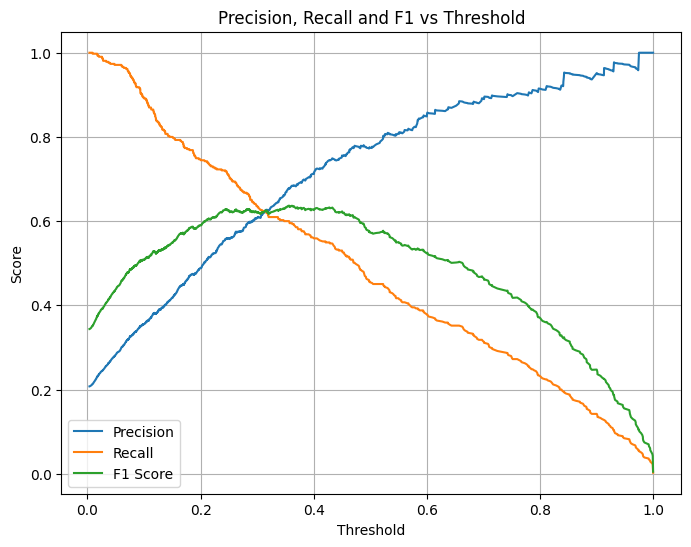

In [187]:
from sklearn.metrics import precision_recall_curve

if pred.ndim > 1 and pred.shape[1] > 1:
    pred = pred[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, pred)

# compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall and F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [188]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, pred)

f1_scores = 2*precision*recall / (precision+recall)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print("Best threshold (F1-based):", best_threshold)
print("Best F1 score:", f1_scores[best_idx])

Best threshold (F1-based): 0.35652113
Best F1 score: 0.6368286445012787


In [189]:
y_pred = np.where(
    pred > 0.35, 1, 0
)

In [190]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [191]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8555

In [193]:
history.history

{'accuracy': [0.7495312690734863,
  0.8165624737739563,
  0.8314062356948853,
  0.8414062261581421,
  0.8451562523841858,
  0.8464062213897705,
  0.8492187261581421,
  0.8514062762260437,
  0.8521875143051147,
  0.8553125262260437,
  0.856249988079071,
  0.8567187786102295,
  0.8565624952316284,
  0.8564062714576721,
  0.8575000166893005,
  0.8575000166893005,
  0.8575000166893005,
  0.858593761920929,
  0.8589062690734863,
  0.8603125214576721,
  0.8612499833106995,
  0.8598437309265137,
  0.8598437309265137,
  0.8618749976158142,
  0.8612499833106995,
  0.8631250262260437,
  0.860156238079071,
  0.8618749976158142,
  0.8617187738418579,
  0.8621875047683716,
  0.8629687428474426,
  0.8612499833106995,
  0.86328125,
  0.8626562356948853,
  0.8629687428474426,
  0.8648437261581421,
  0.8635937571525574,
  0.8643749952316284,
  0.8656250238418579,
  0.8651562333106995],
 'loss': [0.5563530325889587,
  0.44740745425224304,
  0.4113874137401581,
  0.39267826080322266,
  0.381233811378479,

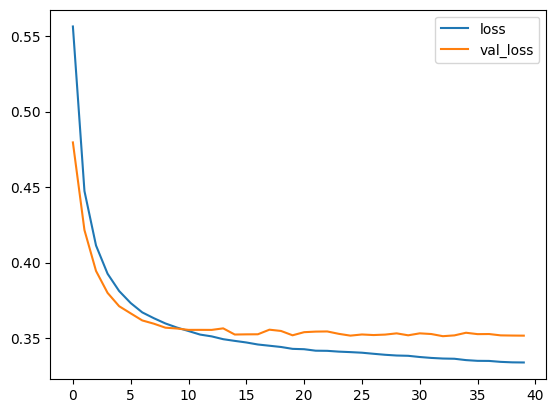

In [197]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

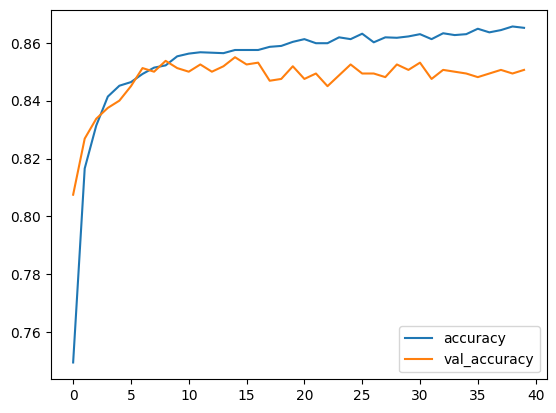

In [198]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

# [chat_gpt](https://chatgpt.com/share/68bd71e3-84f8-8012-b8f3-15c6a6fb8ca3)